In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Let's use a table of nodes and a table of edges of relationships between
# Harry Potter characters from Efe Karakus:
# https://github.com/efekarakus/potter-network

In [2]:
characters = pd.read_csv("potter-network/data/characters.csv")


In [3]:
characters.head()

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [4]:
relations=pd.read_csv("potter-network/data/relations.csv")

In [5]:
relations.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [6]:
import networkx as nx

In [7]:
G = nx.from_pandas_edgelist(relations, source="source", target="target")

In [8]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

In [ ]:
dir(nx) # very long, networkx does a lot of things

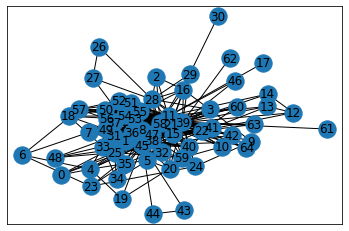

In [10]:
# networkx has some basic graphing and layout functions, 
nx.draw_networkx(G)

In [ ]:
# But having integer labels for nodes is a visualization-killing flaw.  
# How to put labels on the nodes? 

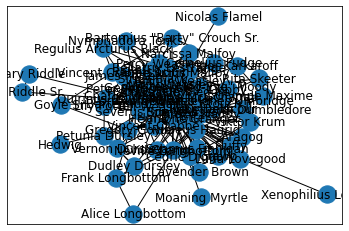

In [11]:
# as a parameter to networkx works, but this is not a long-term solution;
# the networkx graph needs to be invested with the edge geometry and the 
# node names if anything fancy is going to work.
nx.draw_networkx(G, labels=characters.name)

In [12]:
# I can create a dictionary with the mapping from ID to name:
chardict = { x["id"] : x["name"] for i,x in characters.iterrows()}

In [13]:
chardict

{0: 'Regulus Arcturus Black',
 1: 'Sirius Black',
 2: 'Lavender Brown',
 3: 'Cho Chang',
 4: 'Vincent Crabbe Sr.',
 5: 'Vincent Crabbe',
 6: 'Bartemius "Barty" Crouch Sr.',
 7: 'Bartemius "Barty" Crouch Jr.',
 8: 'Fleur Delacour',
 9: 'Cedric Diggory',
 10: 'Alberforth Dumbledore',
 11: 'Albus Dumbledore',
 12: 'Dudley Dursley',
 13: 'Petunia Dursley',
 14: 'Vernon Dursley',
 15: 'Argus Filch',
 16: 'Seamus Finnigan',
 17: 'Nicolas Flamel',
 18: 'Cornelius Fudge',
 19: 'Goyle Sr.',
 20: 'Gregory Goyle',
 21: 'Hermione Granger',
 22: 'Rubeus Hagrid',
 23: 'Igor Karkaroff',
 24: 'Viktor Krum',
 25: 'Bellatrix Lestrange',
 26: 'Alice Longbottom',
 27: 'Frank Longbottom',
 28: 'Neville Longbottom',
 29: 'Luna Lovegood',
 30: 'Xenophilius Lovegood',
 31: 'Remus Lupin',
 32: 'Draco Malfoy',
 33: 'Lucius Malfoy',
 34: 'Narcissa Malfoy',
 35: 'Olympe Maxime',
 36: 'Minerva McGonagall',
 37: 'Alastor "Mad-Eye" Moody',
 38: 'Peter Pettigrew',
 39: 'Harry Potter',
 40: 'James Potter',
 41: 'Lily 

In [14]:
nx.relabel.relabel_nodes(G,chardict, copy=False)

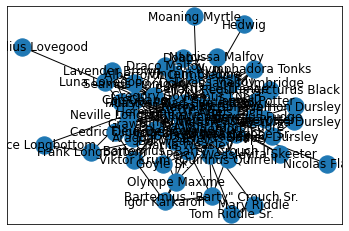

In [15]:
nx.draw_networkx(G)

In [ ]:
# Now the nodes carry human-readable labels.  

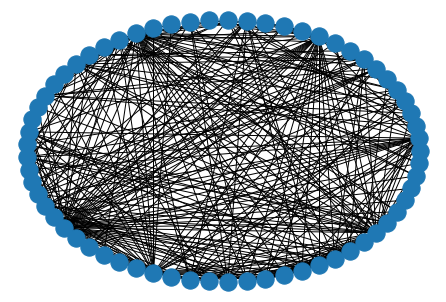

In [16]:
# And some other layout options are available:
nx.draw_circular(G)

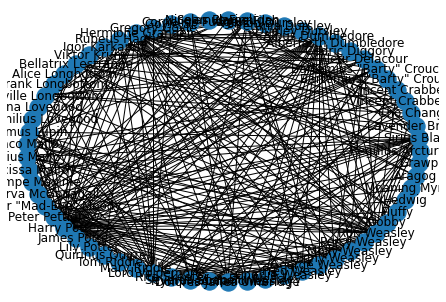

In [17]:
# Not all layout options show the labels by default...
nx.draw_circular(G, with_labels=True)

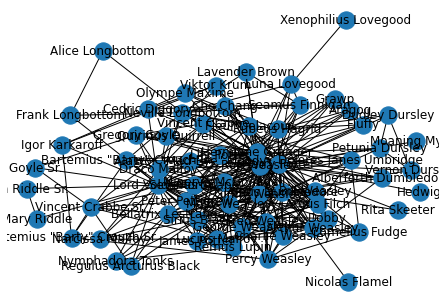

In [18]:
nx.draw_kamada_kawai(G, with_labels=True)

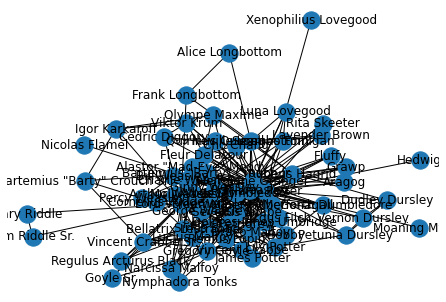

In [19]:
nx.draw_spring(G, with_labels=True)

In [20]:
# These are some bare-bones visualizations, yes.  
# pyvis is a package which, like altair, packages network data and
# hands it off to a renderer in javascript.  It claims more functionality
# for visualization than networkx, but uses networkx data structures.

from pyvis.network import Network

In [21]:
net = Network(notebook=True)

In [22]:
net.from_nx(G)

In [23]:
net.show("potternetwork.html")

In [24]:

net.show_buttons(filter_=['physics'])
net.show("potternetwork.html")


In [ ]:
# While I can play with this a little in the notebook, this really needs its own window.


In [ ]:
net.show_buttons(filter_=['physics'])
net.show("potternetwork.html")

In [ ]:
# Next, I would like to color the nodes according to an attribute.
# I can do this either by creating a list of colors and using it at rendering time,
# or by baking the colors into the network data structure.  

# https://stackoverflow.com/questions/62202944/networkx-pyvis-change-color-of-nodes
# Let us add the colors with an if statement at the time of node creation; we can 
# do what nx.from_pandas_edgelist did and more.

In [ ]:
# G = nx.from_pandas_edgelist(relations, source="source", target="target")

In [26]:
GCOLOR = nx.Graph()

In [27]:
relations.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [ ]:
# Loop through the relationships..
for i, row in relations.iterrows():
    source, target, typ = row
    print(source, target)

#GCOLOR.add_node(source="source", target="target")

In [29]:
GCOLOR=nx.Graph()
# Loop through the relationships..
for i, row in relations.iterrows():
    source, target, typ = row
    GCOLOR.add_edge(source, target)
    

In [30]:
characters.head()

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [31]:
for i, row in characters.iterrows():
    nodeid, name, bio = row
    GCOLOR.add_node(nodeid, title=name, label=name)

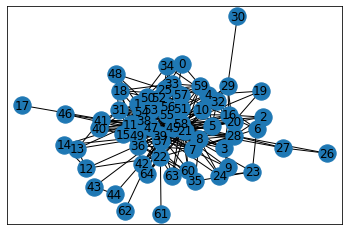

In [32]:
nx.draw_networkx(GCOLOR)

In [34]:
nx.relabel.relabel_nodes(GCOLOR,chardict, copy=False)

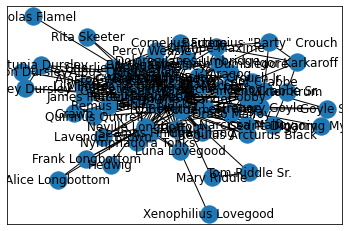

In [35]:
nx.draw_networkx(GCOLOR)

In [ ]:
nx.draw_networkx(GCOLOR)

In [36]:
roles = pd.read_csv("potter-network/data/roles.csv", sep="\t")

In [37]:
roles.head()

,id,name,role
0,0,Regulus Arcturus Black,NaN
1,1,Sirius Black,NaN
2,2,Lavender Brown,student
3,3,Cho Chang,student
4,4,Vincent Crabbe Sr.,NaN


In [38]:
colorlist = []
for i, row in roles.iterrows():
    nodeid, name, role= row
    if role == "student":
        colorlist.append("blue")
    elif role == "faculty":
        colorlist.append("red")
    else:
        colorlist.append("black")

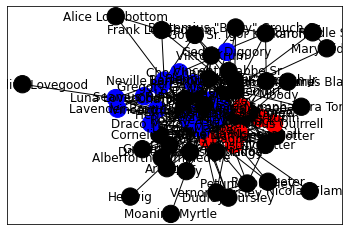

In [40]:
nx.draw_networkx(GCOLOR, node_color=colorlist)

In [45]:

GCOLOR=nx.Graph()
# First, add edges
for i, row in relations.iterrows():
    source, target, typ = row
    GCOLOR.add_edge(source, target)
# next, add node groups (student, faculty, other)
for i, row in roles.iterrows():
    nodeid, name, role= row
    if role == "student":
        GCOLOR.add_node(nodeid, title=name, group=1)
    elif role == "faculty":
        GCOLOR.add_node(nodeid, title=name, group=2)
    else:
        GCOLOR.add_node(nodeid, title=name, group=3)
# finally, add node labels (names)
nx.relabel.relabel_nodes(GCOLOR,chardict, copy=False)

In [46]:
nt = Network(notebook=True)
nt.from_nx(GCOLOR)
nt.show("another.html")